### 0.导入函数库

In [8]:
%matplotlib widget
import matplotlib.pyplot as plt
from utilities.focal_mechanisms import (
    FocalMechanism, NodalPlane, Polarity)
import matplotlib.pyplot as plt
from utilities.focal_mechanisms import FocalMechanism, NodalPlane, Polarity 
import ipysheet
import warnings
warnings.filterwarnings("ignore")
import matplotlib
matplotlib.rcParams.update({# Use mathtext, not LaTeX
                            'text.usetex': False,
                            # Use the Computer modern font
                            'font.family': 'serif',
                            'font.serif': 'cmr10',
                            'mathtext.fontset': 'cm',
                            # Use ASCII minus
                            'axes.unicode_minus': False,
                            })

### 1.震源实验一

移动走向、倾角和滑移角的滑块，与第一个节点面正交，且第一个节点面的滑移矢量与第二个节点面的极点对齐

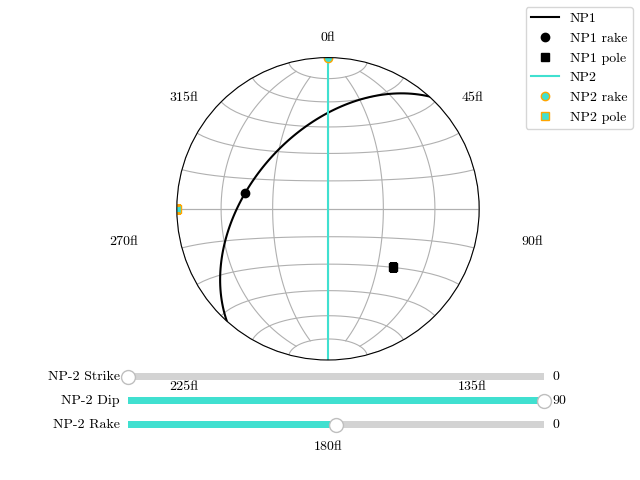

In [4]:

first_nodal_plane = NodalPlane(
    strike=222,
    dip=48, 
    rake=112
)
fig = FocalMechanism(nodal_plane_1=first_nodal_plane).tweak_np2(show=False)

### 2.震源实验二

编辑台站极性（U：表示压缩，D：表示膨胀）

In [5]:
datatable = ipysheet.sheet(rows=19, columns=4)
header = ipysheet.row(
    0, ["Station", "Azimuth", "Take-off angle", "Polarity (U/D)"],
    background_color="lightgrey")
cells = ipysheet.cell_range(
    [["T01", 312, 27, "U"], 
     ["T02", 318, 21, "U"],
     ["T03", 174, 27, "D"],
     ["T04", 11, 70, "D"],
     ["T05", 176, 71, "D"],
     ["T06", 82, 40, "U"],
     ["T07", 245, 41, "U"],
     ["T08", 278, 31, "U"],
     ["T09", 316, 30, "U"],
     ["T10", 75, 34, "U"],
     ["T11", 267, 30, "U"],
     ["T12", 16, 50, "D"],
     ["T13", 40, 52, "D"],
     ["T14", 297, 33, None],
     ["T15", 132, 22, None],
     ["T16", 10, 35, None],
     ["T17", 123, 36, None],
     ["T18", 36, 30, None]
    ], row_start=1);

datatable

Sheet(cells=(Cell(column_end=3, column_start=0, row_end=0, row_start=0, squeeze_column=False, style={'backgrou…

将两个节点面与极性拟合，且正交

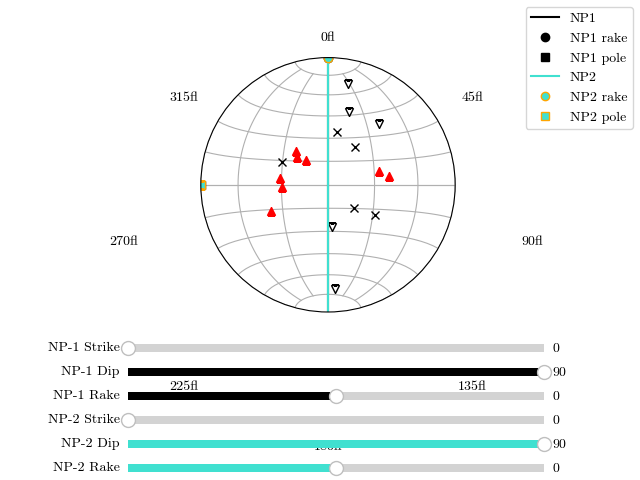

In [7]:
polarities = [Polarity(azimuth=v[1], toa=v[2], polarity=v[3]) for v in cells.value]
fig = FocalMechanism(polarities=polarities).find_planes()